In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_excel('bean.xlsx')

In [3]:
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
data.sample(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
8071,41546,752.073,274.516221,193.011779,1.422277,0.711093,41999,229.995674,0.779065,0.989214,0.923037,0.837822,0.006608,0.002008,0.701945,0.998361,SIRA
5928,48287,869.941,343.725515,180.004646,1.909537,0.851911,49001,247.953459,0.665110,0.985429,0.801790,0.721371,0.007118,0.001189,0.520375,0.993676,HOROZ
11495,30612,652.526,241.311755,161.932370,1.490201,0.741412,31020,197.424439,0.768759,0.986847,0.903454,0.818130,0.007883,0.002178,0.669337,0.997447,DERMASON
4926,78075,1087.899,421.520930,237.685964,1.773436,0.825859,79019,315.290624,0.770335,0.988054,0.828981,0.747983,0.005399,0.001042,0.559479,0.992200,CALI
12102,32990,670.713,245.642341,171.273678,1.434210,0.716830,33358,204.949195,0.742349,0.988968,0.921550,0.834340,0.007446,0.002226,0.696123,0.998386,DERMASON


In [5]:
data['Class']

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

In [6]:
#data.drop_duplicates()

In [7]:
data.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
data.shape

(13611, 17)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [11]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [12]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [13]:
data["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

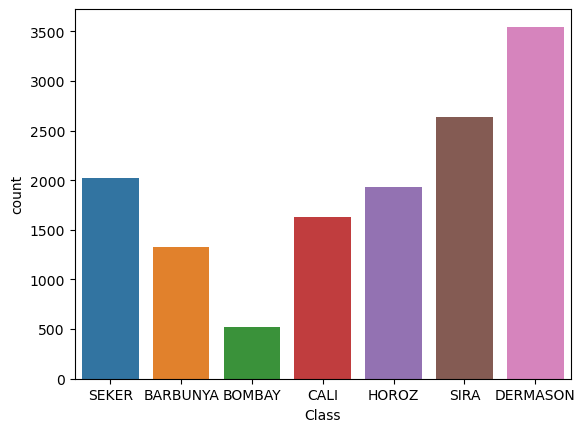

In [14]:
sns.countplot(x='Class', data = data)

In [15]:
labelencoder = LabelEncoder()
data["Class"] = labelencoder.fit_transform(data['Class'])

In [16]:
data.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721,-0.475252
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310,-0.507638
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527,-0.455175
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749,-0.458492
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264,-0.116332
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354,-0.200356
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049,-0.477459
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512,-0.481099
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502,-0.031184
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163,0.321283


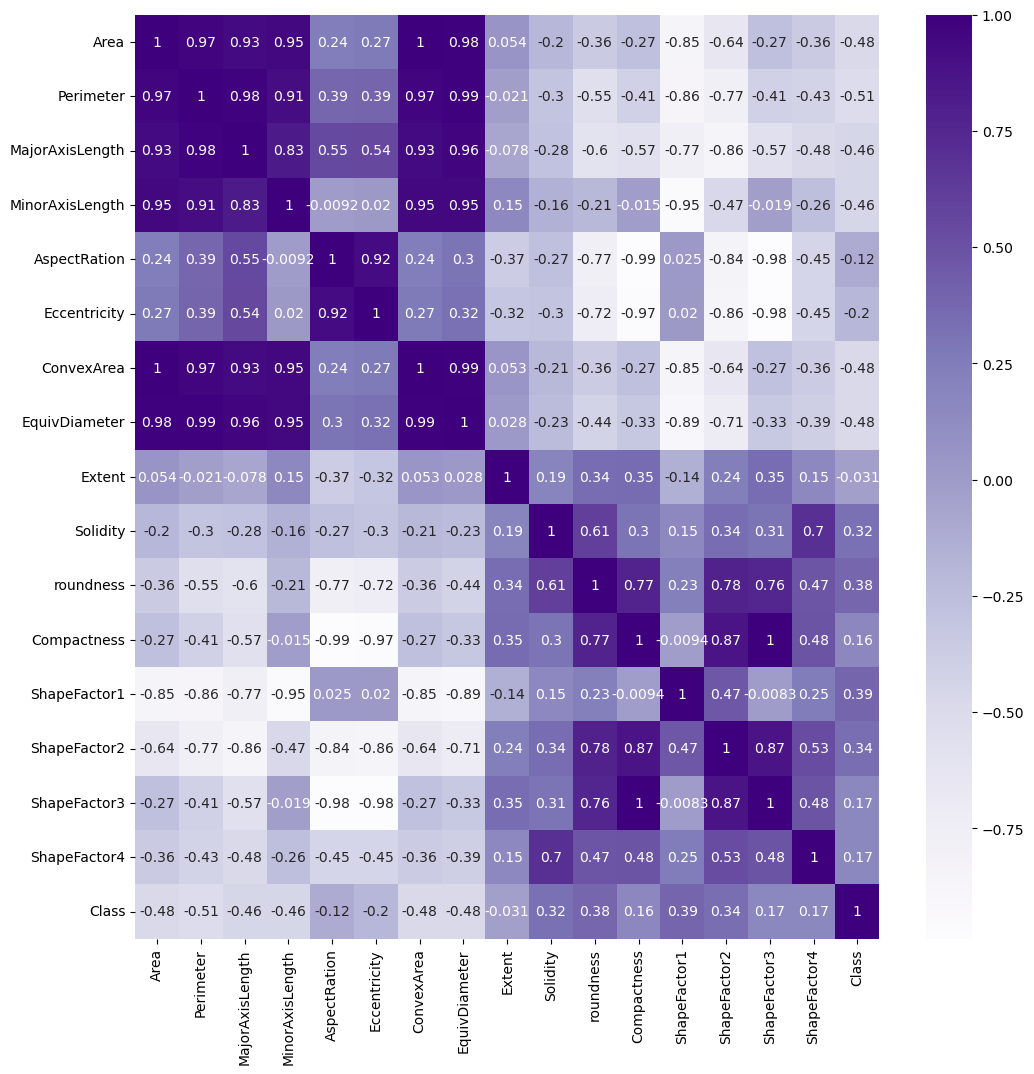

In [17]:
#data.corr #corelasyon matrisi
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Purples)
plt.show()

In [18]:
data = data.drop_duplicates()

In [19]:
x = data.iloc[:,0:16]#bağımsız değişken
y = data.iloc[:,16:]#bağımlı değişken,tahmin değeri,class

In [20]:
y

,Class
0,5
1,5
2,5
3,5
4,5
...,...
13606,3
13607,3
13608,3
13609,3


In [21]:
x

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [22]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

In [23]:
standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(X_train)
x_test = standardscaler.transform(X_test)

# KNN 

In [24]:
knn = KNeighborsClassifier(n_neighbors = 35) #,metric = 'manhattan')
knn.fit(x_train,y_train.values.ravel())
y_predict = knn.predict(x_test)
y_predict

array([5, 2, 3, ..., 2, 4, 2])

In [25]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9217002237136466

In [26]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 393,    0,   38,    0,    1,    4,   11],
       [   0,  177,    0,    0,    0,    0,    0],
       [  13,    0,  505,    0,    8,    1,    5],
       [   0,    0,    0, 1064,    1,   15,   72],
       [   0,    0,   10,    4,  593,    0,   14],
       [   7,    0,    0,   18,    0,  620,   19],
       [   4,    0,    0,   79,   17,    9,  768]], dtype=int64)

# GAUSSİANNAİVEBAYES

In [27]:
gnb = GaussianNB()
gnb.fit(x_train,y_train.values.ravel())
y_predict = gnb.predict(x_test)
y_predict

array([5, 0, 3, ..., 2, 4, 2])

In [28]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8910514541387025

In [29]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[363,   0,  67,   0,   1,   2,  14],
       [  0, 177,   0,   0,   0,   0,   0],
       [ 45,   1, 474,   0,   9,   1,   2],
       [  0,   0,   0, 997,   2,  27, 126],
       [  1,   0,   8,   6, 596,   0,  10],
       [  9,   0,   0,   7,   0, 624,  24],
       [  8,   0,   2,  66,  29,  20, 752]], dtype=int64)

# LOGİSTİC REGRESSİON

In [30]:
logisticreg = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000)
logisticreg.fit(x_train,y_train.values.ravel())
y_predict = logisticreg.predict(x_test)
y_predict

array([5, 2, 3, ..., 2, 4, 2])

In [31]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9208053691275168

In [32]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 410,    0,   22,    0,    0,    2,   13],
       [   0,  177,    0,    0,    0,    0,    0],
       [  20,    0,  495,    0,    8,    2,    7],
       [   0,    0,    0, 1049,    2,   15,   86],
       [   0,    0,    7,    5,  597,    0,   12],
       [   8,    0,    0,   12,    0,  623,   21],
       [   2,    0,    1,   72,   23,   14,  765]], dtype=int64)

# SUPPORT VECTOR MACHİNE

In [33]:
supportvector = SVC(kernel="rbf")
supportvector.fit(x_train,y_train.values.ravel())
y_predict = supportvector.predict(x_test)
y_predict

array([5, 2, 3, ..., 2, 4, 2])

In [34]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9284116331096197

In [35]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 412,    0,   22,    0,    0,    3,   10],
       [   0,  177,    0,    0,    0,    0,    0],
       [  16,    0,  502,    0,    9,    2,    3],
       [   0,    0,    0, 1068,    2,   10,   72],
       [   0,    0,    8,    5,  595,    0,   13],
       [   3,    0,    0,   16,    0,  629,   16],
       [   4,    0,    1,   78,   18,    9,  767]], dtype=int64)

# RANDOM FOREST

In [36]:
randomforest = RandomForestClassifier(criterion = 'entropy',n_estimators = 10,random_state = 42)
randomforest.fit(x_train,y_train.values.ravel())
y_predict = randomforest.predict(x_test)

In [37]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9185682326621923

In [38]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[ 402,    0,   29,    0,    2,    3,   11],
       [   1,  176,    0,    0,    0,    0,    0],
       [  29,    0,  489,    0,    8,    2,    4],
       [   0,    0,    0, 1071,    1,   19,   61],
       [   4,    0,    5,    5,  590,    0,   17],
       [   6,    0,    0,   24,    0,  622,   12],
       [   4,    0,    2,   77,   24,   14,  756]], dtype=int64)

# DECİSİON TREE

In [60]:
decisiontree = DecisionTreeClassifier(criterion = 'entropy',random_state=42)
decisiontree.fit(x_train,y_train.values.ravel())
y_predict = decisiontree.predict(x_test)

In [61]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8919463087248322

In [ ]:
cm = confusion_matrix(y_test,y_predict)
cm

# BOYUT İNDİRGEME

In [39]:
pca = PCA(n_components=8)
pca.fit(x)
x_pca = pca.transform(x)
transformed_data = pd.DataFrame(x_pca)

In [40]:
x = transformed_data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

In [42]:
x_train = standardscaler.fit_transform(X_train)
x_test = standardscaler.transform(X_test)

In [43]:
knn = KNeighborsClassifier(n_neighbors = 35) #,metric = 'manhattan')
knn.fit(x_train,y_train.values.ravel())
y_predict = knn.predict(x_test)
y_predict

array([5, 6, 3, ..., 2, 4, 2])

In [44]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9199105145413871